In [2]:
%load_ext autoreload
%autoreload 2

### grafs

In [3]:
import json
import matplotlib.pyplot as plt

In [4]:
def load_log(name):
    path = f"/home/xstromp/dp/data/models/{name}/my_log_history.json"
    with open(path, 'r') as file:
        data = json.load(file)
    return data

In [21]:
def make_graph(data):
    filtered_data = [item for item in data if 'eval_loss' in item]
    filtered_data = [item for item in filtered_data if item['epoch'] < 5]

    epochs = [item['epoch'] for item in filtered_data]
    eval_loss = [item['eval_loss'] for item in filtered_data]
    eval_ent_type = [item.get('eval_ent_type', 0) for item in filtered_data]
    eval_partial = [item.get('eval_partial', 0) for item in filtered_data]
    eval_strict = [item.get('eval_strict', 0) for item in filtered_data]
    eval_exact = [item.get('eval_exact', 0) for item in filtered_data]
    eval_avg_f1 = [item.get('eval_avg_f1', 0) for item in filtered_data]
    eval_runtime = [item.get('eval_runtime', 0) for item in filtered_data]
    eval_samples_per_second = [item.get('eval_samples_per_second', 0) for item in filtered_data]
    eval_steps_per_second = [item.get('eval_steps_per_second', 0) for item in filtered_data]
    
    plt.figure(figsize=(14, 8))

    # Subplot 1: Evaluation Metrics
    plt.subplot(1, 2, 1)
    # plt.plot(epochs, eval_loss, marker='o', label='Eval Loss')
    plt.plot(epochs, eval_avg_f1, marker='o', label='Eval Avg F1')
    plt.plot(epochs, eval_ent_type, marker='o', label='Eval Ent Type')
    plt.plot(epochs, eval_partial, marker='o', label='Eval Partial')
    plt.plot(epochs, eval_strict, marker='o', label='Eval Strict')
    plt.plot(epochs, eval_exact, marker='o', label='Eval Exact')
    plt.title('Evaluation Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()

    # Subplot 2: Runtime Metrics
    plt.subplot(1, 2, 2)
    plt.plot(epochs, eval_runtime, marker='o', label='Eval Runtime')
    plt.plot(epochs, eval_samples_per_second, marker='o', label='Eval Samples/Sec')
    plt.plot(epochs, eval_steps_per_second, marker='o', label='Eval Steps/Sec')
    plt.title('Runtime Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()

    plt.tight_layout()
    plt.show()


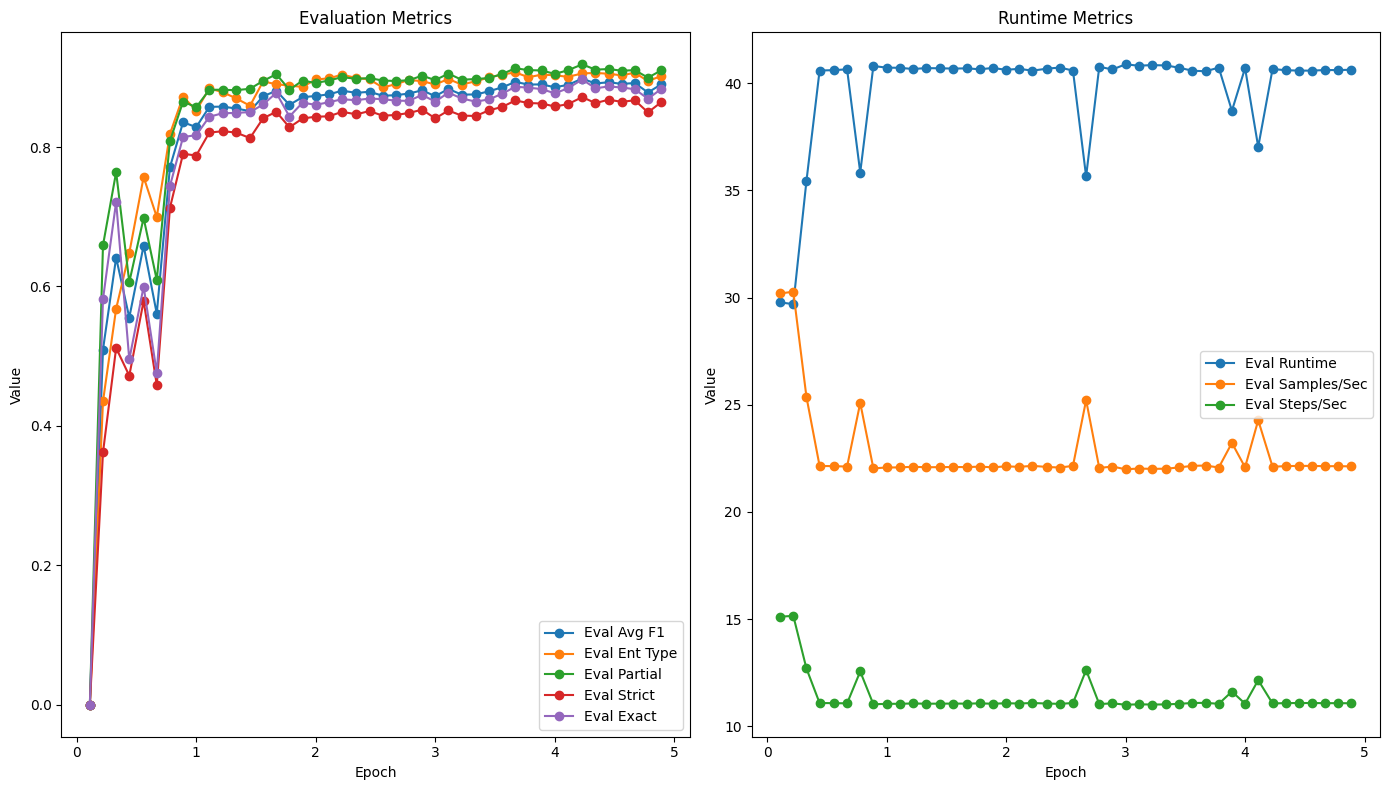

In [27]:
name = "single_lemFalse_czTrue_skTrue"
data = load_log(name)
make_graph(data)

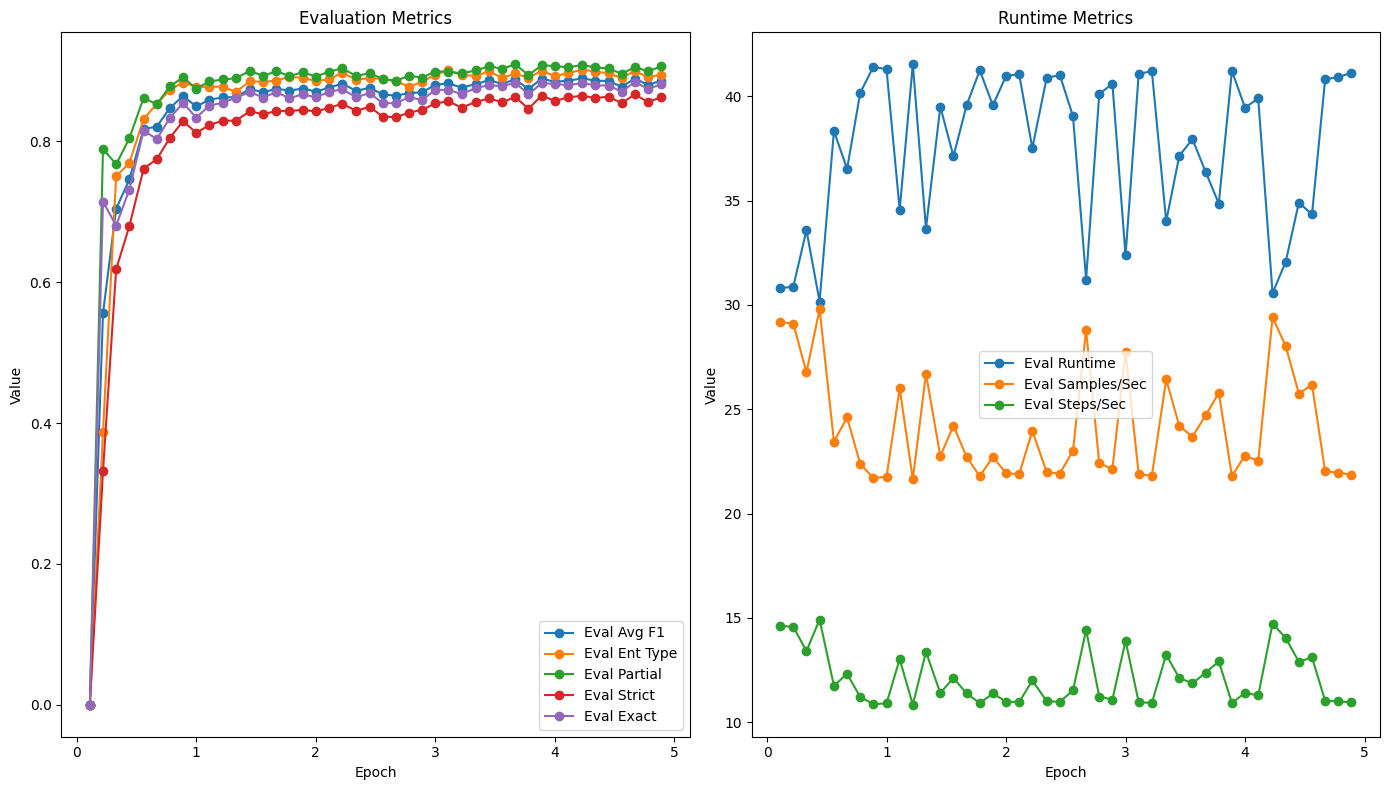

In [23]:
name = "multi_lemTrue_czTrue_skTrue"
data = load_log(name)
make_graph(data)

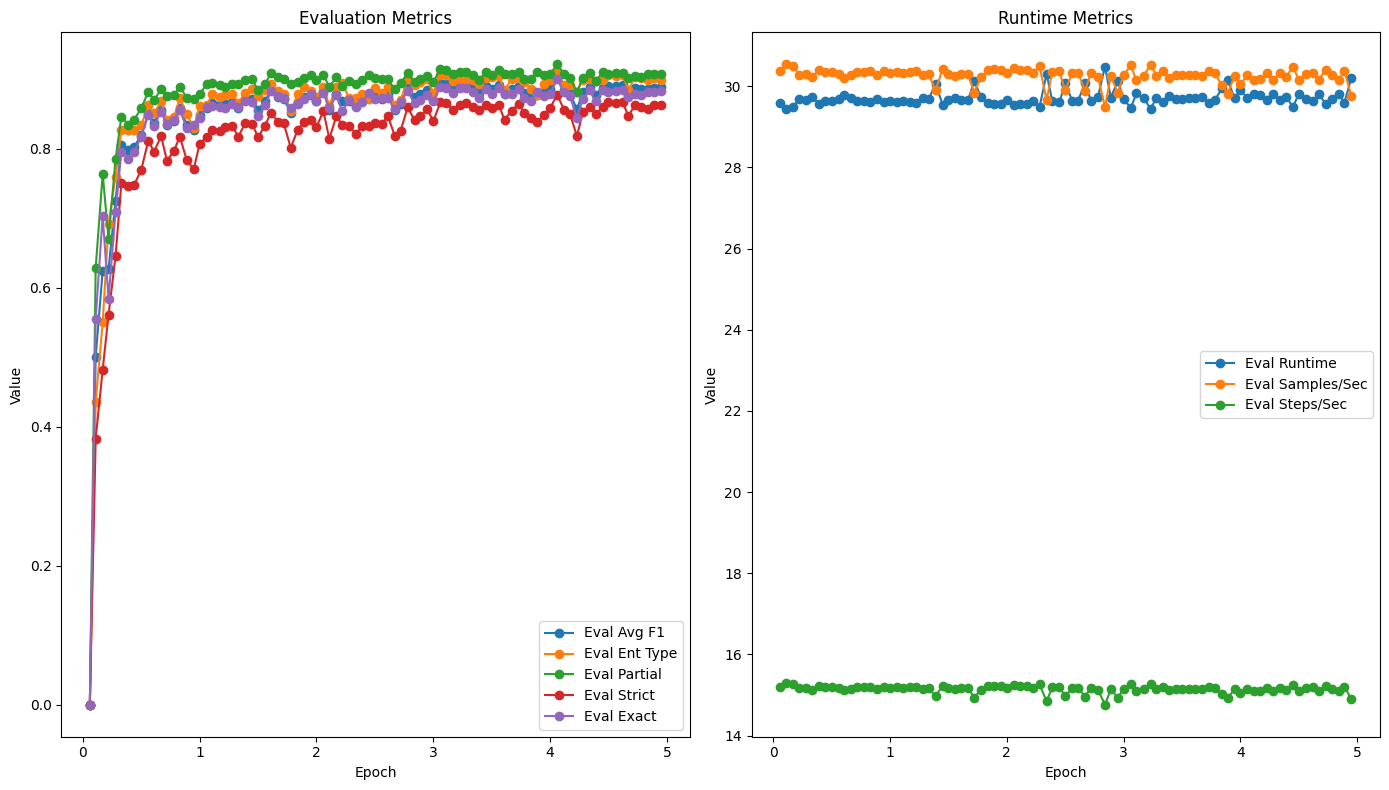

In [24]:
name = "smallexpand_delusion"
data = load_log(name)
make_graph(data)

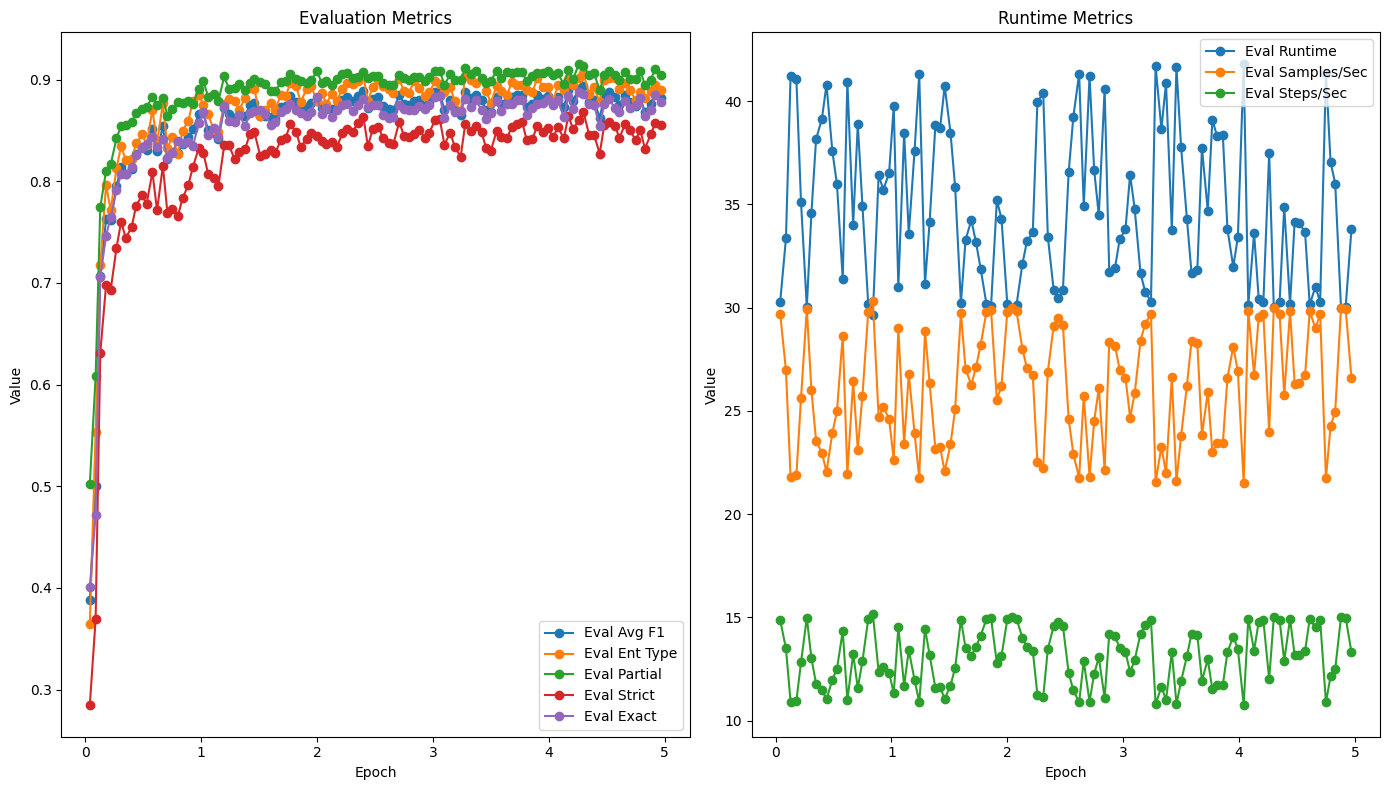

In [25]:
name = "expand_delusion"
data = load_log(name)
make_graph(data)